<a href="https://colab.research.google.com/github/dhsingh0815/ML/blob/main/Classifier/DecisionTree_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://towardsdatascience.com/entropy-how-decision-trees-make-decisions-2946b9c18c8

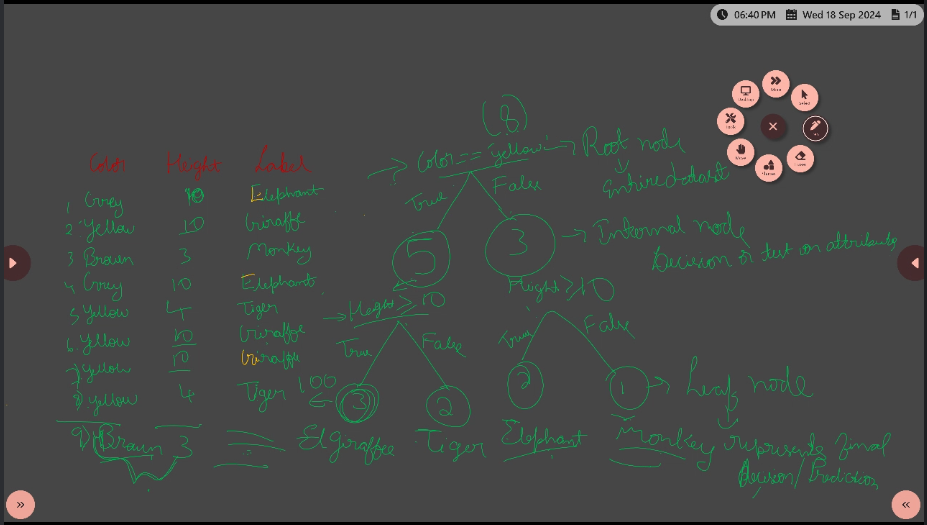

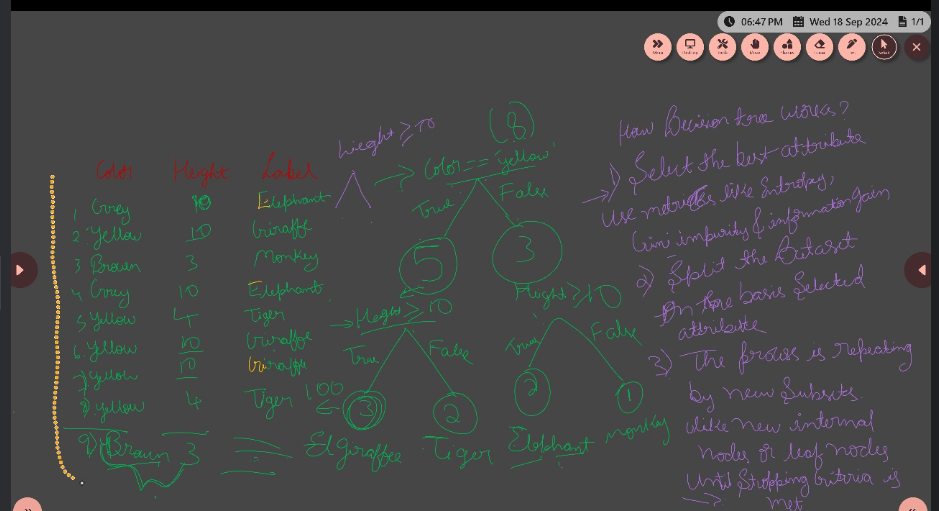

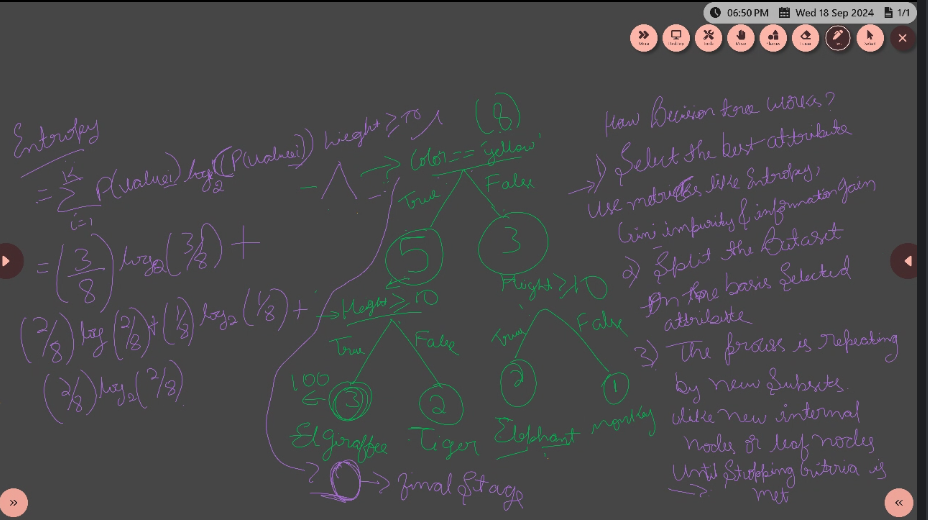

In [1]:
pip install pydotplus

In [2]:
!apt install libgraphviz-dev
!pip install pygraphviz

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libgail-common libgail18 libgtk2.0-0 libgtk2.0-bin libgtk2.0-common libgvc6-plugins-gtk
  librsvg2-common libxdot4
Suggested packages:
  gvfs
The following NEW packages will be installed:
  libgail-common libgail18 libgraphviz-dev libgtk2.0-0 libgtk2.0-bin libgtk2.0-common
  libgvc6-plugins-gtk librsvg2-common libxdot4
0 upgraded, 9 newly installed, 0 to remove and 49 not upgraded.
Need to get 2,434 kB of archives.
After this operation, 7,681 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 libgtk2.0-common all 2.24.33-2ubuntu2.1 [125 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 libgtk2.0-0 amd64 2.24.33-2ubuntu2.1 [2,038 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 libgail18 amd64 2.24.33-2ubuntu2.1 [15.9 kB]
Get:4 http://archive.ubun

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from math import log2

In [4]:
df = pd.read_csv('/content/PastHires.csv')


In [5]:
df.head(5)

Years Experience Employed?  Previous employers Level of Education  \
0                10         Y                   4                 BS   
1                 0         N                   0                 BS   
2                 7         N                   6                 BS   
3                 2         Y                   1                 MS   
4                20         N                   2                PhD   

  Top-tier school Interned Hired  
0               N        N     Y  
1               Y        Y     Y  
2               N        N     N  
3               Y        N     Y  
4               Y        N     N

In [6]:
d ={'Y' :1 , 'N':0}
df['Hired']=df['Hired'].map(d)
df['Employed?']=df['Employed?'].map(d)
df['Top-tier school']=df['Top-tier school'].map(d)
df['Interned']=df['Interned'].map(d)
d ={'BS' :0 , 'MS':1, 'PhD':2}
df['Level of Education']=df['Level of Education'].map(d)

In [7]:
df.head()

Years Experience  Employed?  Previous employers  Level of Education  \
0                10          1                   4                   0   
1                 0          0                   0                   0   
2                 7          0                   6                   0   
3                 2          1                   1                   1   
4                20          0                   2                   2   

   Top-tier school  Interned  Hired  
0                0         0      1  
1                1         1      1  
2                0         0      0  
3                1         0      1  
4                1         0      0

In [8]:
num = df.select_dtypes(exclude=['object']).columns.tolist()
print(num)

['Years Experience', 'Employed?', 'Previous employers', 'Level of Education', 'Top-tier school', 'Interned', 'Hired']


Years Experience
Employed?
Previous employers
Level of Education
Top-tier school
Interned
Hired


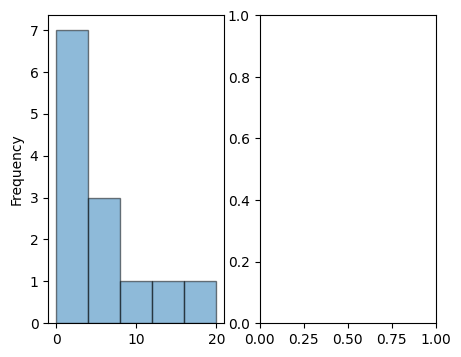

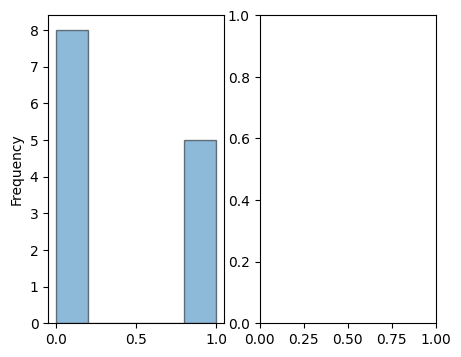

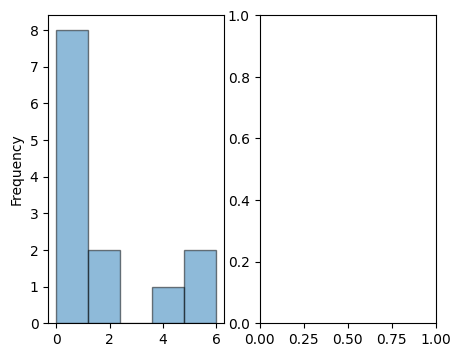

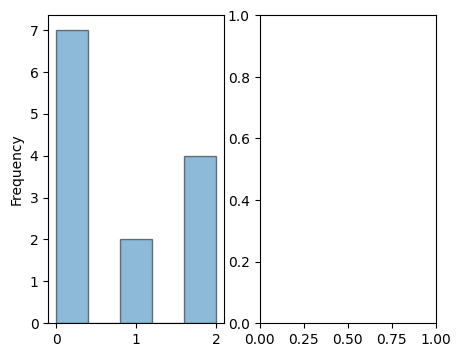

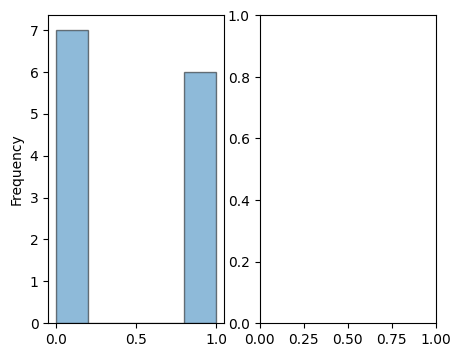

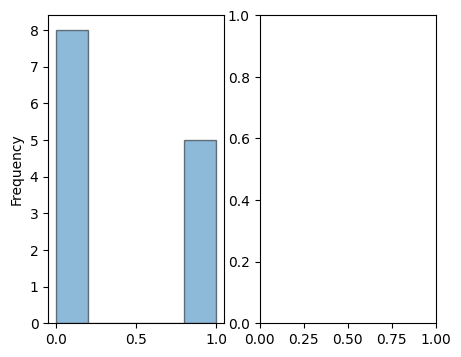

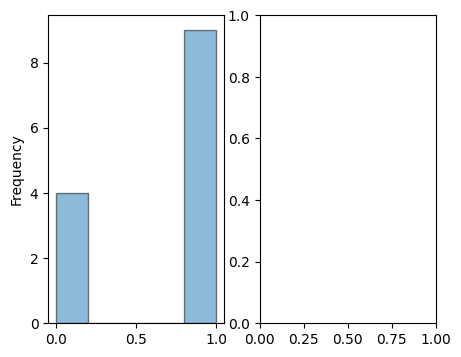

In [9]:
for col in num:
  print(col)

  plt.figure(figsize=(5,4))
  plt.subplot(1,2,1)
  df[col].hist(bins=5, alpha=0.5, grid=False, edgecolor='black')
  plt.ylabel('Frequency')
  plt.subplot(1,2,2)


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus

In [11]:
df.columns

Index(['Years Experience', 'Employed?', 'Previous employers',
       'Level of Education', 'Top-tier school', 'Interned', 'Hired'],
      dtype='object')

In [12]:
features = list(df.columns[:6])
features

['Years Experience',
 'Employed?',
 'Previous employers',
 'Level of Education',
 'Top-tier school',
 'Interned']

In [13]:
y= df['Hired']
X = df[features]


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
model =DecisionTreeClassifier(criterion='entropy')
model.fit(X_train, y_train)
model

DecisionTreeClassifier(criterion='entropy')

In [16]:
X_train[X_train['Interned']==0]

Years Experience  Employed?  Previous employers  Level of Education  \
8                 15          1                   5                   0   
2                  7          0                   6                   0   
12                 0          0                   0                   2   
4                 20          0                   2                   2   
10                 1          0                   1                   2   
3                  2          1                   1                   1   

    Top-tier school  Interned  
8                 0         0  
2                 0         0  
12                1         0  
4                 1         0  
10                1         0  
3                 1         0

In [17]:
X_train[X_train['Interned']==1]

Years Experience  Employed?  Previous employers  Level of Education  \
5                 0          0                   0                   2   
1                 0          0                   0                   0   
7                 3          0                   1                   0   
6                 5          1                   2                   1   

   Top-tier school  Interned  
5                1         1  
1                1         1  
7                0         1  
6                0         1

<Axes: >

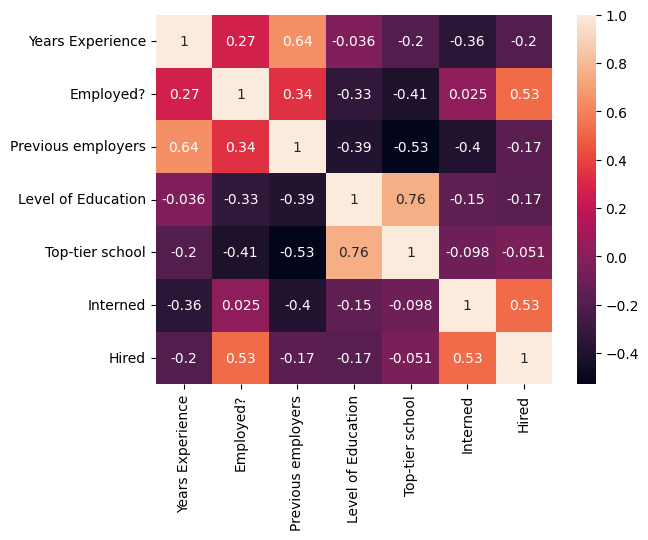

In [18]:
corr =df.corr()
sns.heatmap(corr, annot=True)

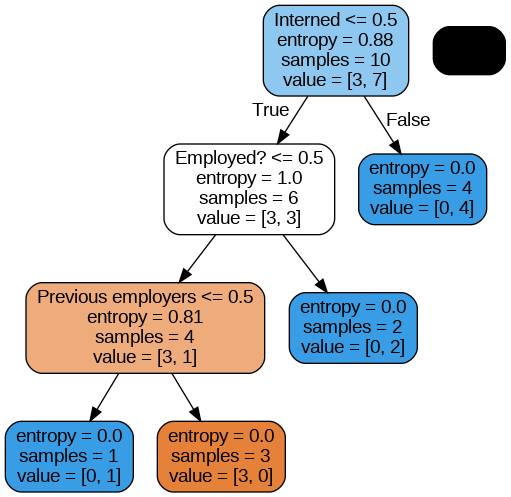

In [19]:
dot_data = export_graphviz(model , feature_names=X_train.columns, rounded=True, proportion=False, precision=2, filled=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

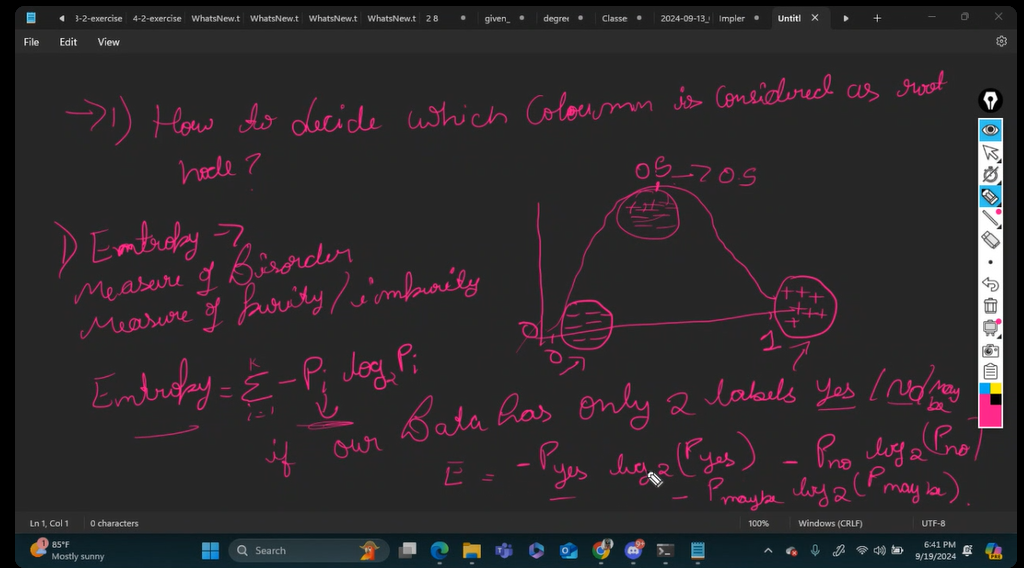

In [20]:
df[df['Hired']==0]

Years Experience  Employed?  Previous employers  Level of Education  \
2                  7          0                   6                   0   
4                 20          0                   2                   2   
9                  0          0                   0                   0   
10                 1          0                   1                   2   

    Top-tier school  Interned  Hired  
2                 0         0      0  
4                 1         0      0  
9                 0         0      0  
10                1         0      0

In [21]:
df[df['Hired']==1]

Years Experience  Employed?  Previous employers  Level of Education  \
0                 10          1                   4                   0   
1                  0          0                   0                   0   
3                  2          1                   1                   1   
5                  0          0                   0                   2   
6                  5          1                   2                   1   
7                  3          0                   1                   0   
8                 15          1                   5                   0   
11                 4          1                   1                   0   
12                 0          0                   0                   2   

    Top-tier school  Interned  Hired  
0                 0         0      1  
1                 1         1      1  
3                 1         0      1  
5                 1         1      1  
6                 0         1      1  
7                 0         1      1  
8                 0         0      1  
11                0         1      1  
12                1         0      1

In [22]:
df['Hired'].value_counts()

Hired
1    9
0    4
Name: count, dtype: int64

In [23]:
print('Entropy for column Hired is : ',-(9/13 * log2(9/13)) - (4/13 * log2(4/13)))

Entropy for column Hired is :  0.8904916402194913


In [24]:
df['Interned'].value_counts()

Interned
0    8
1    5
Name: count, dtype: int64

Find Entropy of Interned w.r.t Hired column

In [25]:
df2=df[df['Interned']==1]
df2[['Interned','Hired']]

Interned  Hired
1          1      1
5          1      1
6          1      1
7          1      1
11         1      1

In [26]:
df2=df[df['Interned']==0]
df2[['Interned','Hired']]

Interned  Hired
0          0      1
2          0      0
3          0      1
4          0      0
8          0      1
9          0      0
10         0      0
12         0      1

In [34]:
df[['Interned','Hired']].groupby(['Interned']).sum()

Hired
Interned       
0             4
1             5

In [27]:
print('Entropy for column Interned is : ',-(8/13 * log2(8/13)) - (5/13 * log2(5/13)))

Entropy for column Interned is :  0.9612366047228759


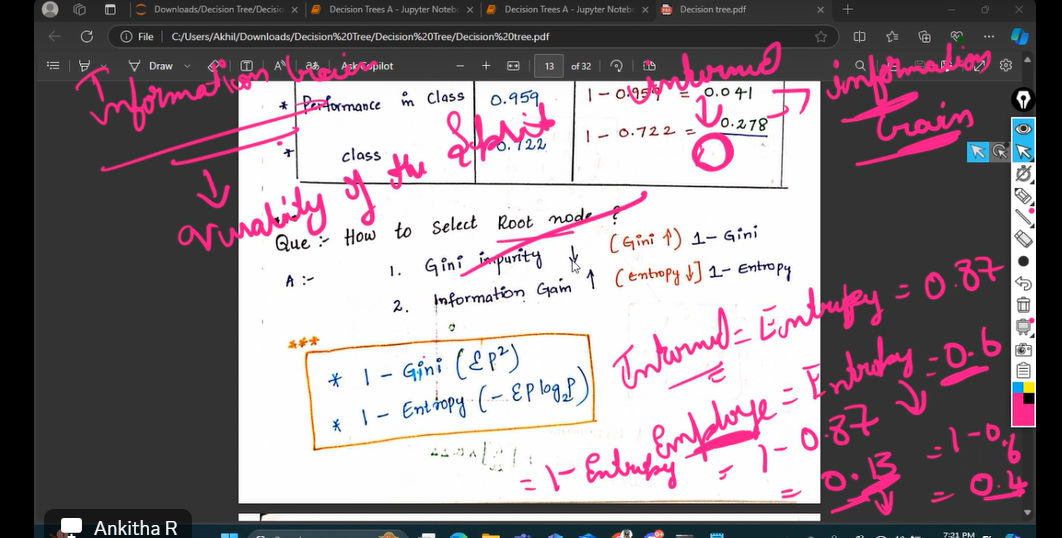

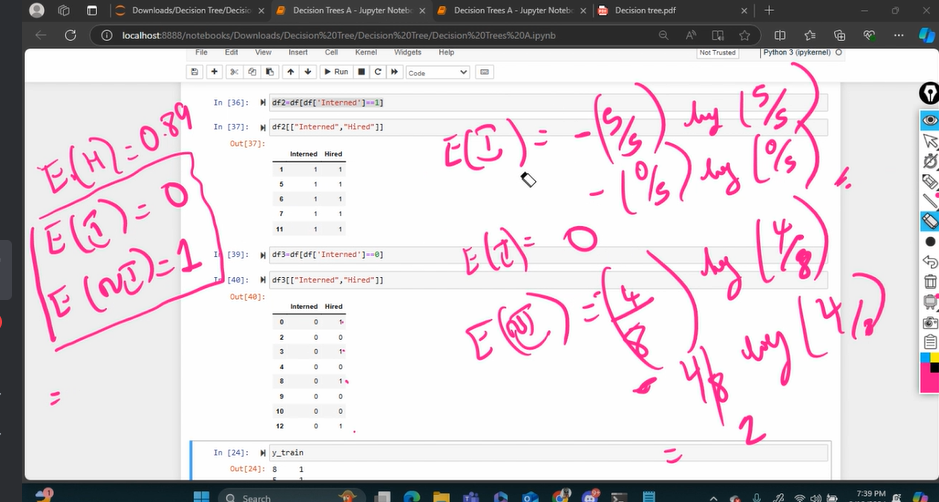

In [28]:
df3=df[df['Employed?']==0]
df3[['Employed?','Hired']]

Employed?  Hired
1           0      1
2           0      0
4           0      0
5           0      1
7           0      1
9           0      0
10          0      0
12          0      1

In [29]:
print('Entropy of not employed',(-(4/8) * log2(4/8) - 4/8 * log2(4/8)))

Entropy of not employed 1.0


In [30]:
df3=df[df['Employed?']==1]
df3[['Employed?','Hired']]

Employed?  Hired
0           1      1
3           1      1
6           1      1
8           1      1
11          1      1

# Calculating Weighted Average
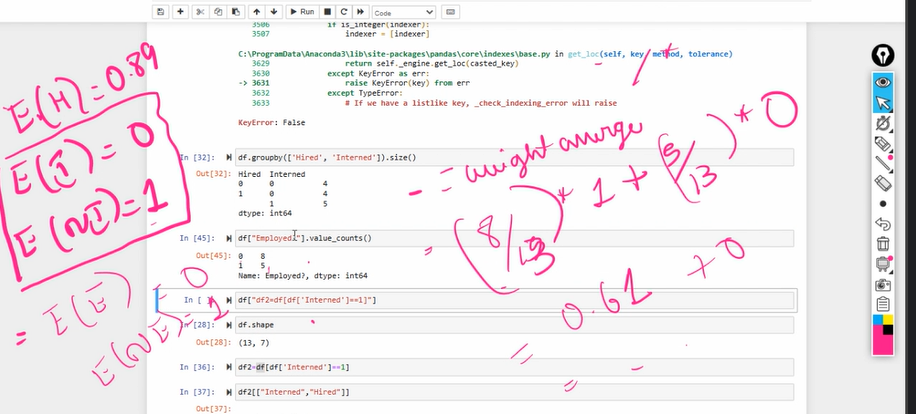

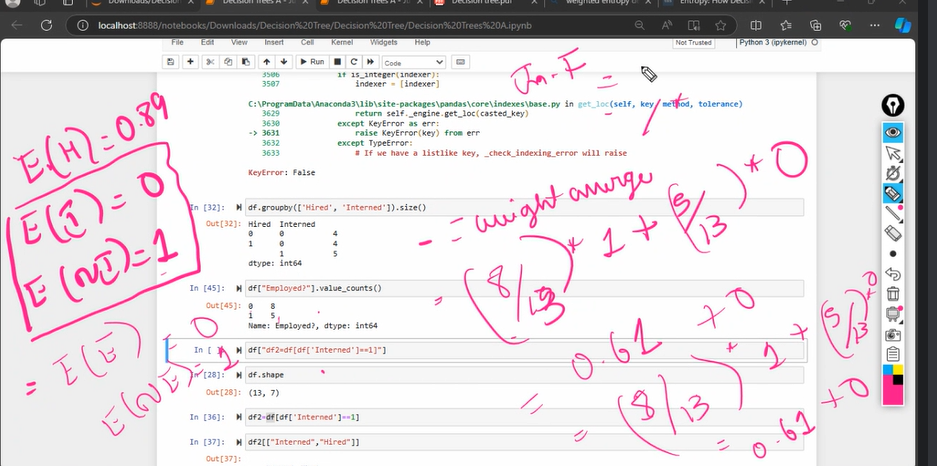

Root Node is selected based on information Gain

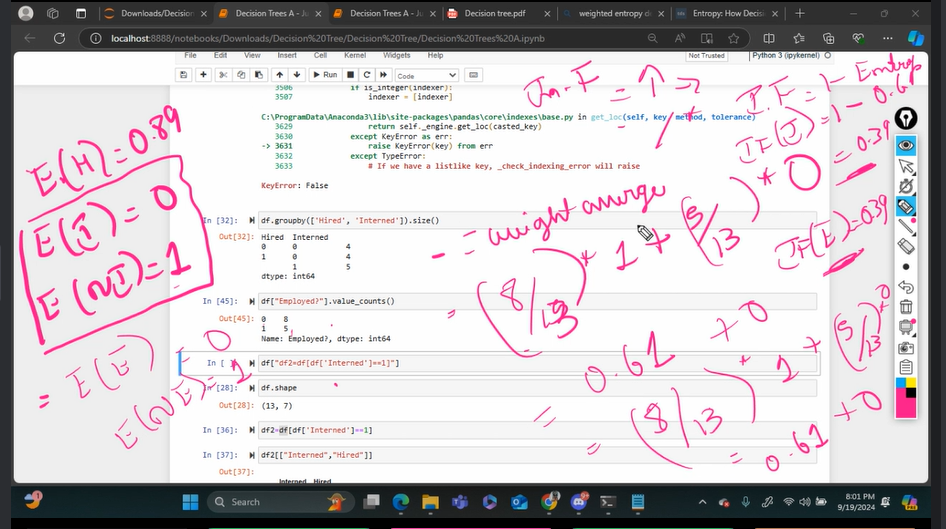

we can calculate entropy by the formula Ei -P log2P for categorical columns.
For columns with continous values, there is a different way to calculate entropy

In [35]:
df.head(5)

Years Experience  Employed?  Previous employers  Level of Education  \
0                10          1                   4                   0   
1                 0          0                   0                   0   
2                 7          0                   6                   0   
3                 2          1                   1                   1   
4                20          0                   2                   2   

   Top-tier school  Interned  Hired  
0                0         0      1  
1                1         1      1  
2                0         0      0  
3                1         0      1  
4                1         0      0

In [37]:
df3=df[df['Top-tier school']==0]
df3[['Top-tier school','Hired']]

Top-tier school  Hired
0                 0      1
2                 0      0
6                 0      1
7                 0      1
8                 0      1
9                 0      0
11                0      1

In [38]:
df3=df[df['Top-tier school']==1]
df3[['Top-tier school','Hired']]

Top-tier school  Hired
1                 1      1
3                 1      1
4                 1      0
5                 1      1
10                1      0
12                1      1

In [41]:

print('Entropy of Top-tier school',(-(2/7) * log2(2/7) - (5/7) * log2(5/7) -(2/6) * log2(2/6) - (4/6) * log2(4/6)))

Entropy of Top-tier school 1.7814164026211206


In [42]:
df['Level of Education'].value_counts()

Level of Education
0    7
2    4
1    2
Name: count, dtype: int64

In [43]:
df3=df[df['Level of Education']==0]
df3[['Level of Education','Hired']]

Level of Education  Hired
0                    0      1
1                    0      1
2                    0      0
7                    0      1
8                    0      1
9                    0      0
11                   0      1

In [44]:
df3=df[df['Level of Education']==1]
df3[['Level of Education','Hired']]

Level of Education  Hired
3                   1      1
6                   1      1

In [45]:
df3=df[df['Level of Education']==2]
df3[['Level of Education','Hired']]

Level of Education  Hired
4                    2      0
5                    2      1
10                   2      0
12                   2      1

In [46]:
print('Entropy of Level of Education',(-(2/7) * log2(2/7) - (5/7) * log2(5/7) -(2/4) * log2(2/4) - (2/4) * log2(2/4)))

Entropy of Level of Education 1.863120568566631
